In [2]:
import os
import sys

os.environ['PROJ_LIB'] = os.path.join(sys.prefix, 'share', 'proj')

In [3]:
import time
import requests
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

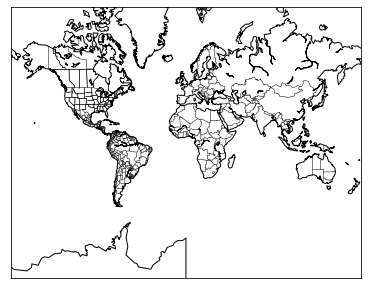

In [21]:
#drawing a world map
plt.figure(figsize=(10, 5))

Map = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

Map.drawcoastlines()
Map.drawcountries()
Map.drawstates()

In [15]:

producer_link = "http://api.open-notify.org/iss-now.json"
coords = []
start= time.time()

while time.time() - start < 60*60: # To Stream data for an hour
    # To fetch data from the producer link
    response = requests.get(producer_link)
    
    data = response.json()
    lat = data["iss_position"]["latitude"]
    long = data["iss_position"]["longitude"]
    
    coords.append((float(lat), float(long)))
    
    #stream interval
    time.sleep(5)


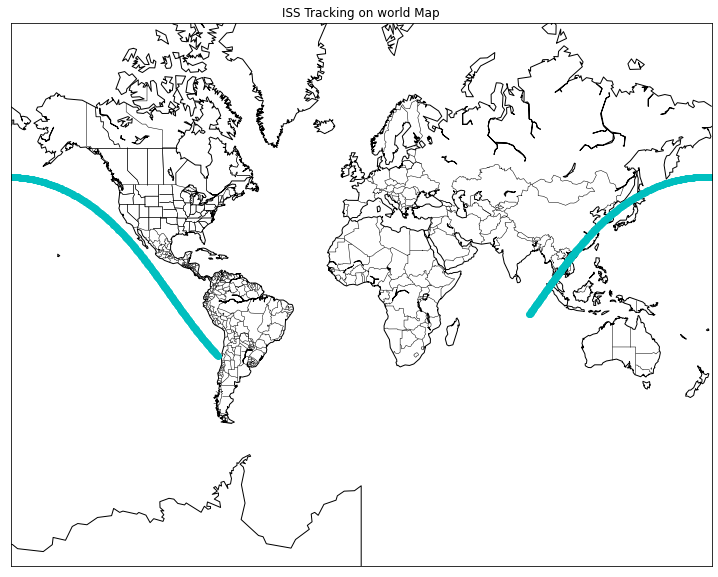

In [18]:
plt.figure(figsize=(18, 10))

Map = Basemap(projection='merc', llcrnrlat=-80, urcrnrlat=80, llcrnrlon=-180, urcrnrlon=180, lat_ts=20, resolution='c')

Map.drawcoastlines()
Map.drawcountries()
Map.drawstates()
for i in range(len(coords)):
    lat, lon = coords[i]
    x, y = Map(lon, lat)
    Map.plot(x, y, 'co', markersize=6)
    time.sleep(0.1)

plt.title("ISS Tracking on world Map")
plt.show()


Reference:https://basemaptutorial.readthedocs.io/en/latest/